In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from Adam import AdamOptim
from Logreg import LogisticRegression

In [18]:
from sklearn.impute import SimpleImputer
url = 'data/small/banana_quality.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[-1.0226372, 1.3525982, 2.1665268, ..., -0.37416488, 1.7987777,
        3.6068983],
       [1.5060107, -0.7162992, -1.6493984, ..., 0.43827882, 0.9532326,
        -2.0825098],
       [2.3373246, -2.7330942, -1.8445215, ..., 1.7296923, 0.45957714,
        -2.0129273],
       ...,
       [-2.3278835, 1.4624916, 2.7264822, ..., -2.4935296, 0.41607416,
        0.6473107],
       [1.2660545, -1.480548, -4.7579174, ..., -0.82058555, -1.8375558,
        3.3234797],
       [-1.368017, -6.1855893, -3.2415981, ..., -3.3358593, -1.3280531,
        -1.6012908]], dtype=object)

In [17]:
from sklearn.impute import SimpleImputer
url = 'data/big/nba-players.csv'
dataframe = pd.read_csv(url)
dataframe.drop('name', axis=1, inplace=True)
dataframe.drop('Unnamed: 0', axis=1, inplace=True)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[58. , 12.8,  4. , ...,  0.2,  1.4,  0.7],
       [38. ,  8.5,  3.2, ...,  0.2,  0.4,  0.5],
       [67. , 16.7,  5. , ...,  1. ,  0.3,  0.8],
       ...,
       [70. , 12.7,  4.8, ...,  0.9,  0.1,  0.9],
       [78. , 22.6,  7.5, ...,  0.7,  0.8,  1. ],
       [82. , 30.8, 10.1, ...,  1.2,  0.6,  2. ]])

In [16]:
url = "data/big/smoking.csv"
dataframe = pd.read_csv(url)
dataframe.drop('oral', axis=1, inplace=True)
data = dataframe.values

X, y = data[:,:-1], data[:,-1]
X[:,1] = LabelEncoder().fit_transform(X[:,1])
X[:,-1] = LabelEncoder().fit_transform(X[:,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [15]:
from utils import createFeatureInteractions
X_int = createFeatureInteractions(X_train)
print(len(X_train[0]),len(X_int[0]))

25 325


In [9]:
from utils import fitComparisonModels
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
accuracy_score(y_test, y_lda), accuracy_score(y_test, y_qda), accuracy_score(y_test, y_dt), accuracy_score(y_test, y_rf)

(0.7377682018134483,
 0.7232247059879702,
 0.7657778974773319,
 0.8286201633898914)

Early stopping after epoch 295
0.7364487239916504
0.7307657778974773


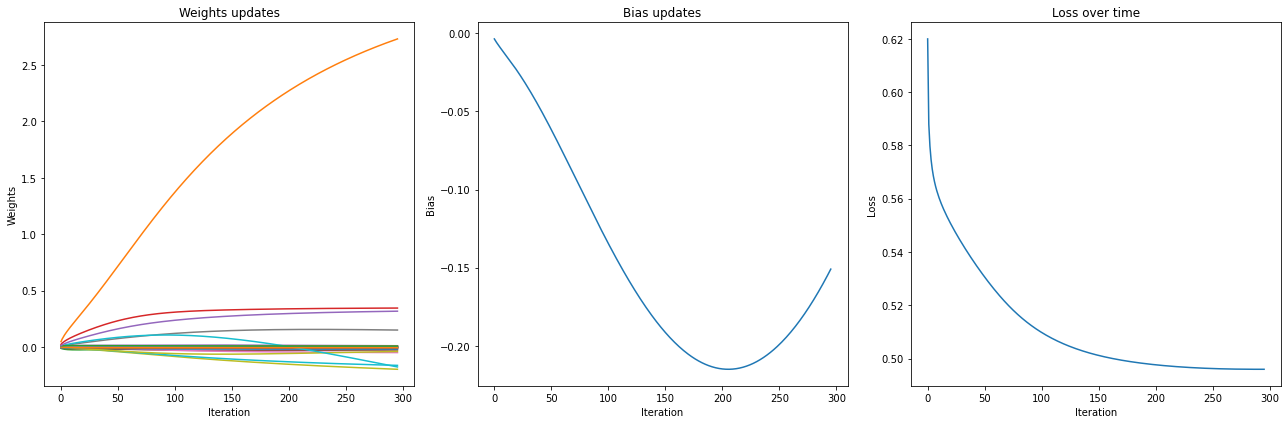

In [12]:
logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
adam_optimizer = AdamOptim(eta=0.0001)

logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=1000, batch_size=32)
y_pred_train=logistic_regression_model.predict(X_train).round()
print(accuracy_score(y_pred_train, y_train))
y_pred = logistic_regression_model.predict(X_test)
print(accuracy_score(y_pred.round(), y_test))

logistic_regression_model.plot_params()
